# MacPaw Data Science Internship 2021
## Vitaliy Povstenko

Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.kernel_ridge import KernelRidge


%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option("display.precision", 2)
pd.options.mode.chained_assignment = None

### Load Data

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_prediction = pd.read_csv('data/sample_prediction.csv')

In [3]:
train.drop(train.tail(1).index,inplace=True)
print(train.shape)
train.head()

(1459, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(test.shape)
test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(sample_prediction.shape)
sample_prediction.head()

(1459, 2)


,Id,SalePrice
0,1461,169277.05
1,1462,187758.39
2,1463,183583.68
3,1464,179317.48
4,1465,150730.08


#### Target Variable: `SalePrice`

## Explore Data

In [6]:
# Merge train and test dataframe to one
train_n = train.shape[0]
data_test_id = test['Id']

data = pd.concat((train, test)).reset_index(drop=True)
data.drop(columns=['SalePrice'])
print(data.shape)
data.head()

(2918, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


- Main statictic information

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2918.00,2918.00,2432.00,2918.00,2918.00,2918.00,2918.00,2918.00,2895.00,2917.00,2917.00,2917.00,2917.00,2918.00,2918.00,2918.0,2918.00,2916.00,2916.00,2918.00,2918.00,2918.00,2918.00,2918.00,2918.00,2759.00,2917.00,2917.00,2918.00,2918.00,2918.00,2918.00,2918.00,2918.00,2918.00,2918.00,2918.00,1459.00
mean,1460.00,57.15,69.30,10168.19,6.09,5.56,1971.31,1984.27,102.24,441.29,49.50,560.92,1051.71,1159.55,336.60,4.7,1500.84,0.43,0.06,1.57,0.38,2.86,1.04,6.45,0.60,1978.12,1.77,472.94,93.49,47.48,23.11,2.60,16.07,2.25,50.84,6.21,2007.79,180944.10
std,842.93,42.52,23.35,7888.35,1.41,1.11,30.30,20.89,179.36,455.63,169.18,439.55,440.83,392.43,428.73,46.4,506.12,0.52,0.25,0.55,0.50,0.82,0.21,1.57,0.65,25.58,0.76,215.40,125.99,67.59,64.25,25.19,56.19,35.67,567.50,2.72,1.32,79464.92
min,1.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.0,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1895.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,730.25,20.00,59.00,7477.00,5.00,5.00,1953.25,1965.00,0.00,0.00,0.00,220.00,793.00,876.00,0.00,0.0,1126.00,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1960.00,1.00,320.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00,129950.00
50%,1460.00,50.00,68.00,9452.50,6.00,5.00,1973.00,1993.00,0.00,368.00,0.00,467.00,989.00,1082.00,0.00,0.0,1444.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1979.00,2.00,480.00,0.00,26.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,2189.75,70.00,80.00,11573.50,7.00,6.00,2001.00,2004.00,164.00,733.00,0.00,806.00,1302.00,1387.75,704.00,0.0,1743.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,70.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,2919.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1526.00,2336.00,6110.00,5095.00,2065.00,1064.0,5642.00,3.00,2.00,4.00,2.00,8.00,3.00,15.00,4.00,2207.00,5.00,1488.00,1424.00,742.00,1012.00,508.00,576.00,800.00,17000.00,12.00,2010.00,755000.00


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2918 non-null   int64  
 1   MSSubClass     2918 non-null   int64  
 2   MSZoning       2914 non-null   object 
 3   LotFrontage    2432 non-null   float64
 4   LotArea        2918 non-null   int64  
 5   Street         2918 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2918 non-null   object 
 8   LandContour    2918 non-null   object 
 9   Utilities      2916 non-null   object 
 10  LotConfig      2918 non-null   object 
 11  LandSlope      2918 non-null   object 
 12  Neighborhood   2918 non-null   object 
 13  Condition1     2918 non-null   object 
 14  Condition2     2918 non-null   object 
 15  BldgType       2918 non-null   object 
 16  HouseStyle     2918 non-null   object 
 17  OverallQual    2918 non-null   int64  
 18  OverallC

- Check nulls

In [9]:
data.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2720
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

`Alley`, `PoolQC`, `Fence`, `MiscFeature` - мають дуже багато пропусків, тому їх треба виключити з датасету

In [10]:
data = data.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'])
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


### Analyzing target variable

In [11]:
data_target = train[['SalePrice']]

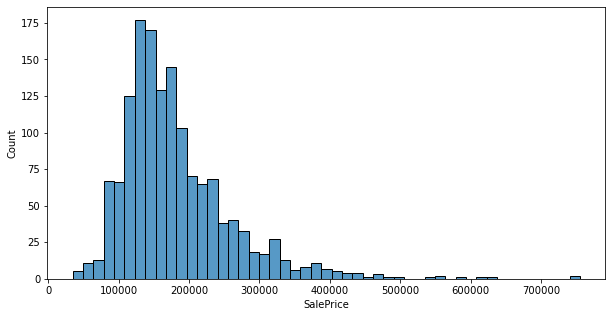

Skew = 1.8817600468196507


In [12]:
fig, ax = plt.subplots(1, figsize=(10, 5))
sns.histplot(x=data_target['SalePrice'], ax=ax)
plt.show()
print('Skew =', data_target['SalePrice'].skew())

### Exploring numerical data

відокремлюємо числові змінні з датасету - всі, які не є стрічковими крім `'OverallQual', 'OveralCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Fireplaces'` бо вони категоріальні

In [13]:
data_numerical = data[[col for col in data if data[col].dtype != 'object']].drop(columns=['OverallQual', 'OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','Fireplaces'])
print(data_numerical.shape)
data_numerical.head()

(2918, 31)


,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,3,1,8,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,3,1,6,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,3,1,6,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,3,1,7,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,4,1,9,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0


Для того, щоб зрозуміти які змінні є ключевими, треба побудувати матрицю кореляції

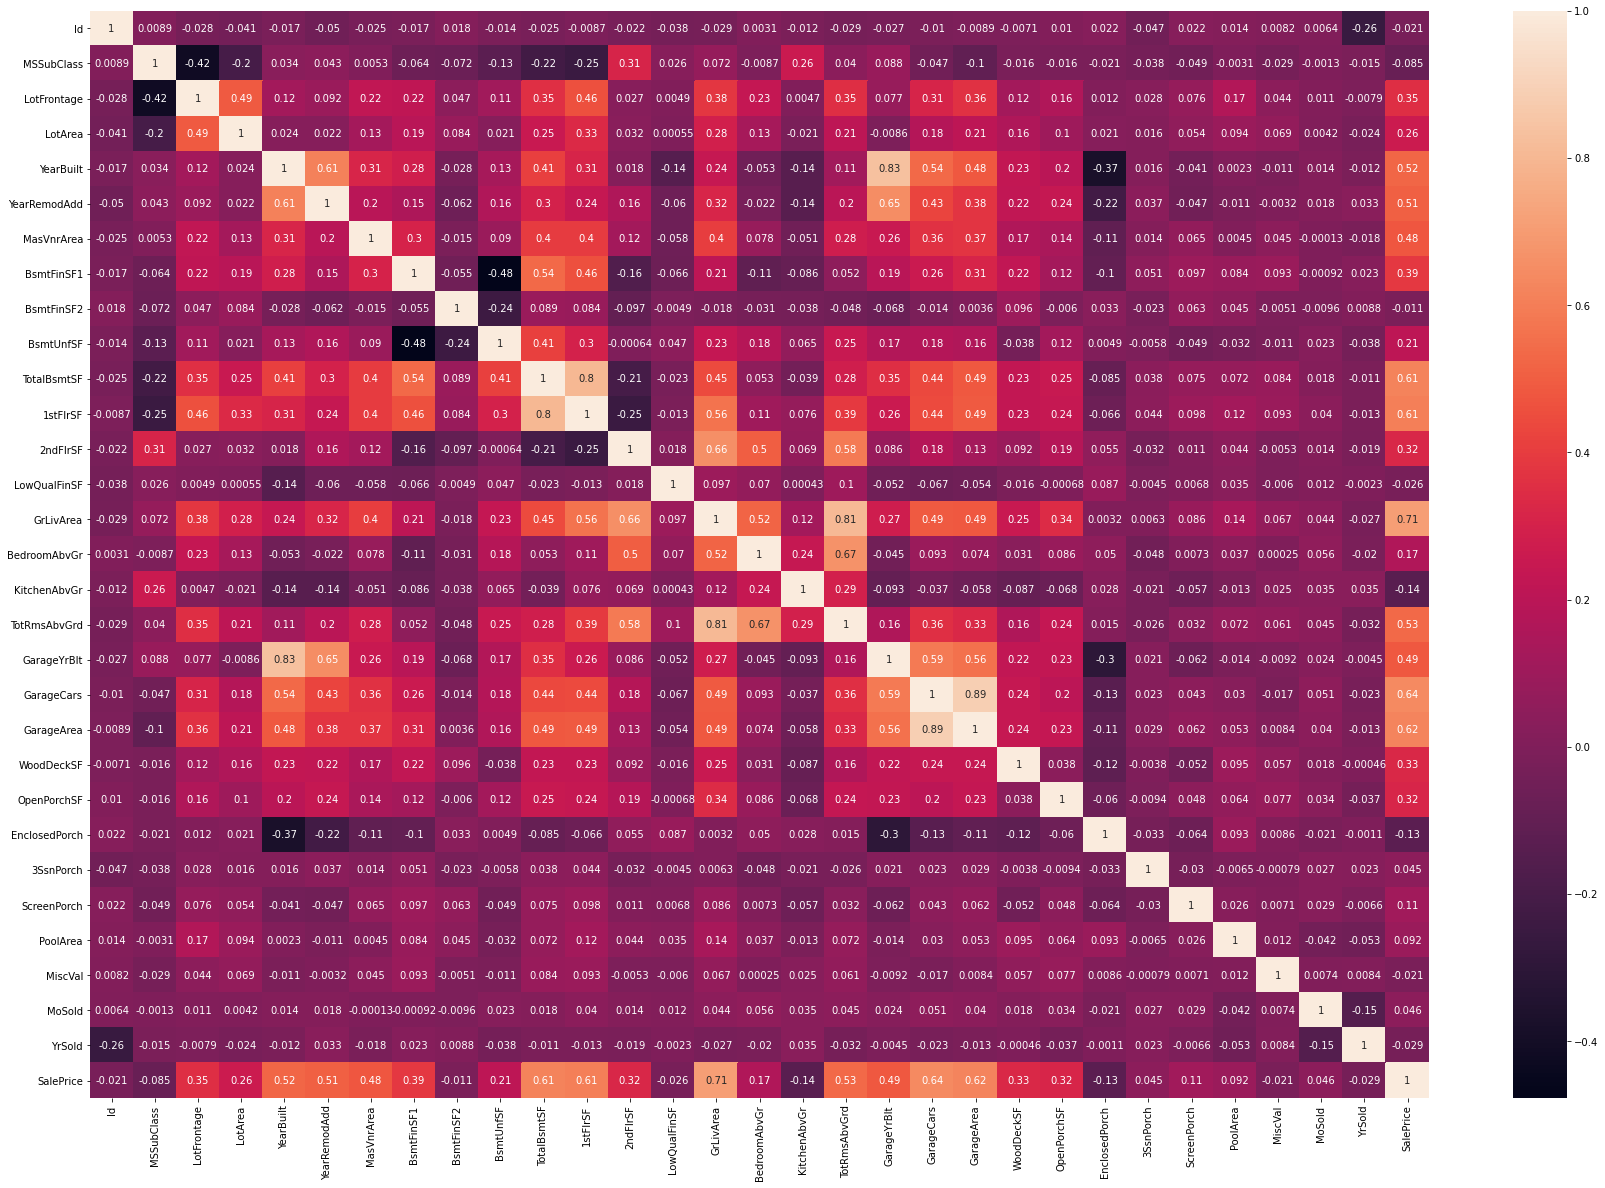

In [14]:
f, ax = plt.subplots(1,1,figsize=(30,20))
coef = data_numerical.corr(method='pearson')
sns.heatmap(coef, annot=True)
plt.show()

Для того щоб уникнути зайвого навантаження на модель, видалимо змінні, які мають високий коефіцієнт кореляції між собою, бо вони дублюються. Тобто, треба залишити одну з двох змінних, які повторюють один одну.

In [15]:
data_numerical = data_numerical.drop(columns=['TotalBsmtSF', 'GarageYrBlt', 'GarageCars', 'TotRmsAbvGrd'])

Дивлячись на коефіцієнти на цільовій змінній, можна визначити змінні, які не впливають, або відносно мало впливають на таргет:

In [16]:
data_numerical = data_numerical.drop(columns=['Id', 'MSSubClass', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtUnfSF', '3SsnPorch', 'ScreenPorch',
                                              'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'KitchenAbvGr', 'EnclosedPorch', 'BedroomAbvGr'])

Отримаємо числові змінні, які найбільше впливають на `SalePrice`

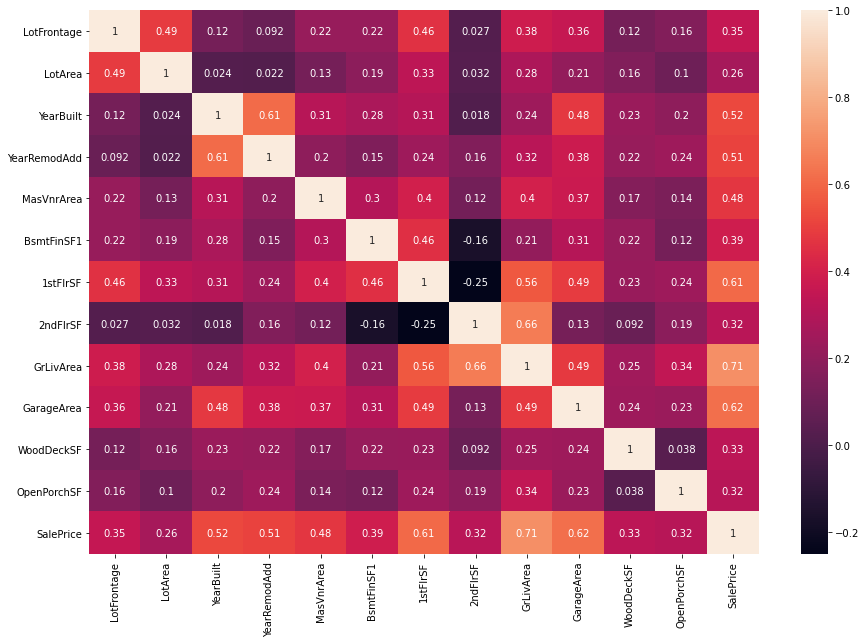

In [17]:
f, ax = plt.subplots(1,1,figsize=(15,10))
coef = data_numerical.corr(method='pearson')
sns.heatmap(coef, annot=True)
plt.show()

In [18]:
data_numerical = data_numerical.drop(columns=['SalePrice'])
print(data_numerical.shape)
data_numerical.head()

(2918, 12)


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
0,65.0,8450,2003,2003,196.0,706.0,856,854,1710,548.0,0,61
1,80.0,9600,1976,1976,0.0,978.0,1262,0,1262,460.0,298,0
2,68.0,11250,2001,2002,162.0,486.0,920,866,1786,608.0,0,42
3,60.0,9550,1915,1970,0.0,216.0,961,756,1717,642.0,0,35
4,84.0,14260,2000,2000,350.0,655.0,1145,1053,2198,836.0,192,84


графіки розподілу числових змінних та їх коефіцієнт нахилу

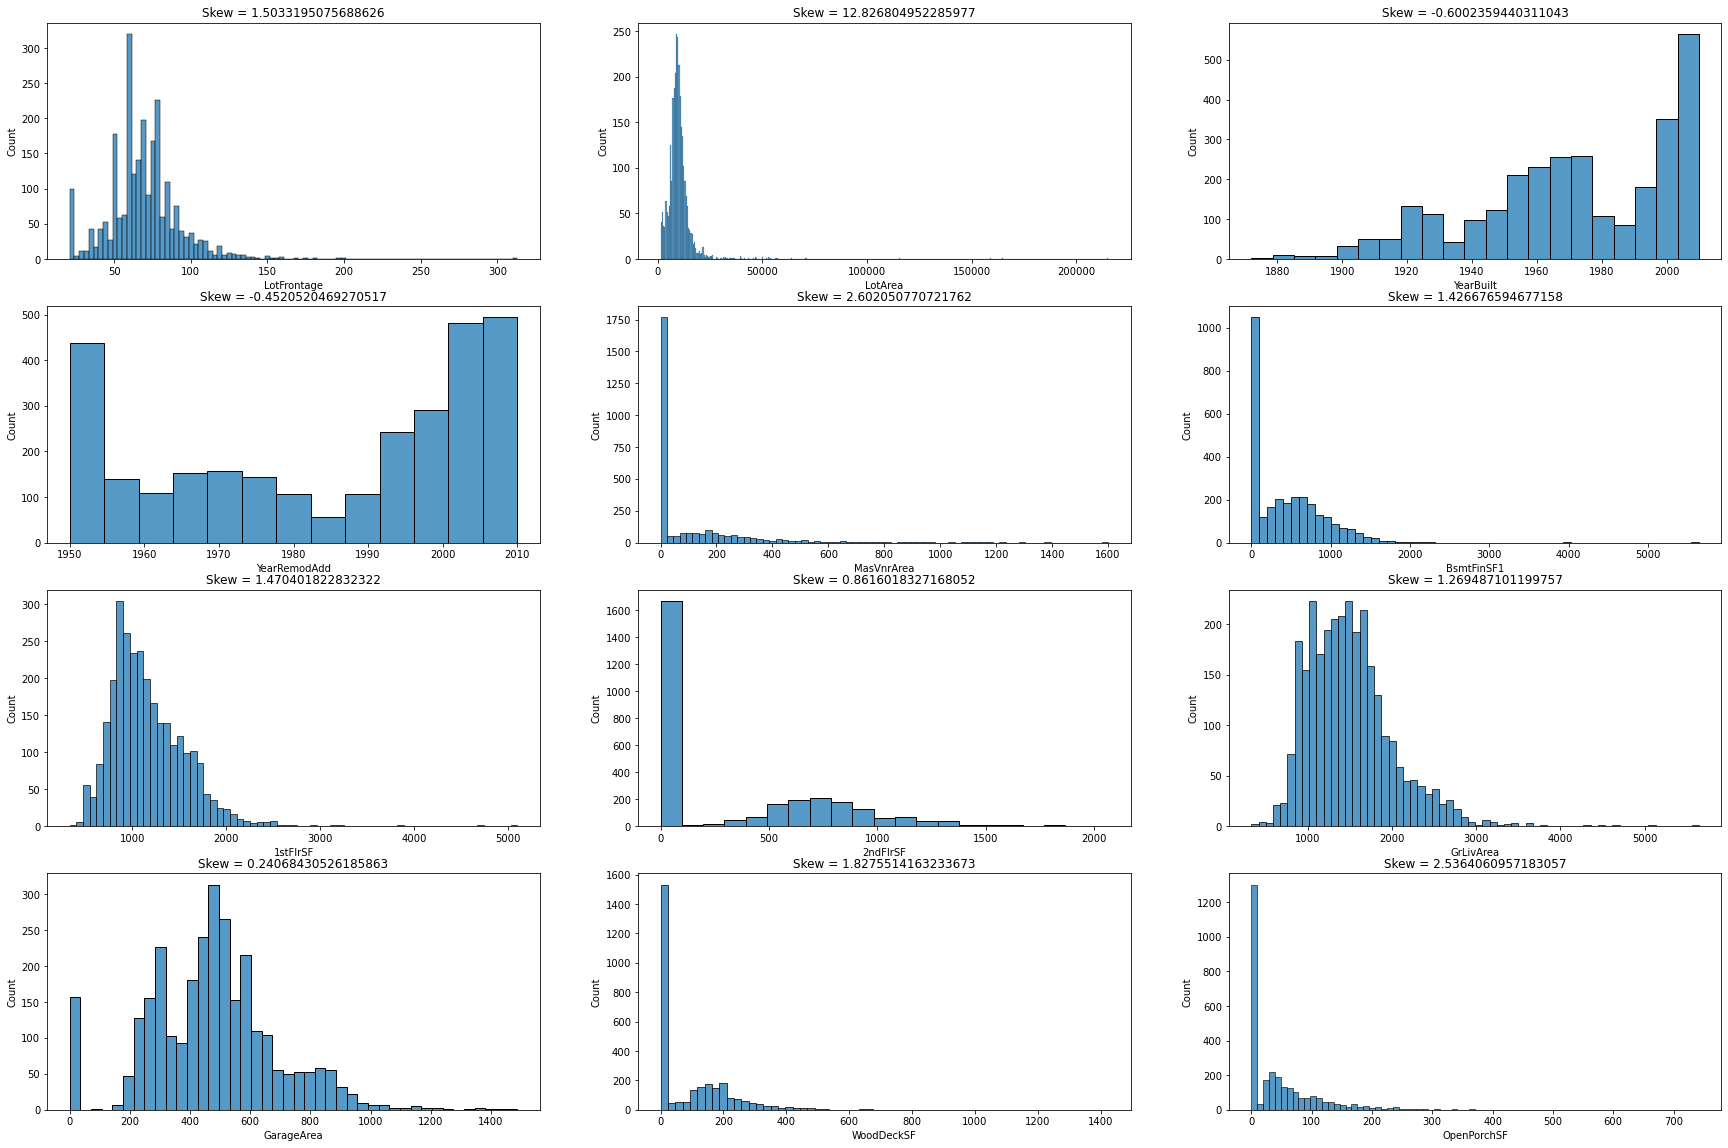

In [19]:
fig, ax = plt.subplots(4, 3, figsize=(30, 20))
for variable, subplot in zip(data_numerical, ax.flatten()):
    sns.histplot(x=data_numerical[variable], ax=subplot)
    subplot.set_title("Skew = " + str(data_numerical[variable].skew()))

### Exploring Categorical Data

Відокремлю катеогріальні змінні в окремий датасет - всі стрічкові змінні, `SalePrice` та `'OverallQual', 'OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','Fireplaces'`

In [20]:
object_columns = [col for col in data if data[col].dtype == 'object']
data_categorical = data[object_columns + ['OverallQual', 'OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','Fireplaces', 'SalePrice']]
print(data_categorical.shape)
data_categorical.head()

(2918, 47)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Fireplaces,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal,7,5,1.0,0.0,2,1,0,208500.0
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,6,8,0.0,1.0,2,0,1,181500.0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,7,5,1.0,0.0,2,1,1,223500.0
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,7,5,1.0,0.0,1,0,1,140000.0
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,8,5,1.0,0.0,2,1,1,250000.0


Щоб перетворити категоріальні змінні в числову шкалу, треба закодувати їх

In [21]:
for var in data_categorical[object_columns]:
    data_categorical[var] = data_categorical[var].astype('category').cat.codes

print(data_categorical.shape)
data_categorical.head()

(2918, 47)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Fireplaces,SalePrice
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,-1,1,1,4,4,2,8,4,7,5,1.0,0.0,2,1,0,208500.0
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,8,4,6,8,0.0,1.0,2,0,1,181500.0
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4,7,5,1.0,0.0,2,1,1,223500.0
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,8,0,7,5,1.0,0.0,1,0,1,140000.0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,8,4,8,5,1.0,0.0,2,1,1,250000.0


Тепер можемо показати матрицю кореляції за Пірсоном щоб дослідити зв'язок між категоріальними змінними

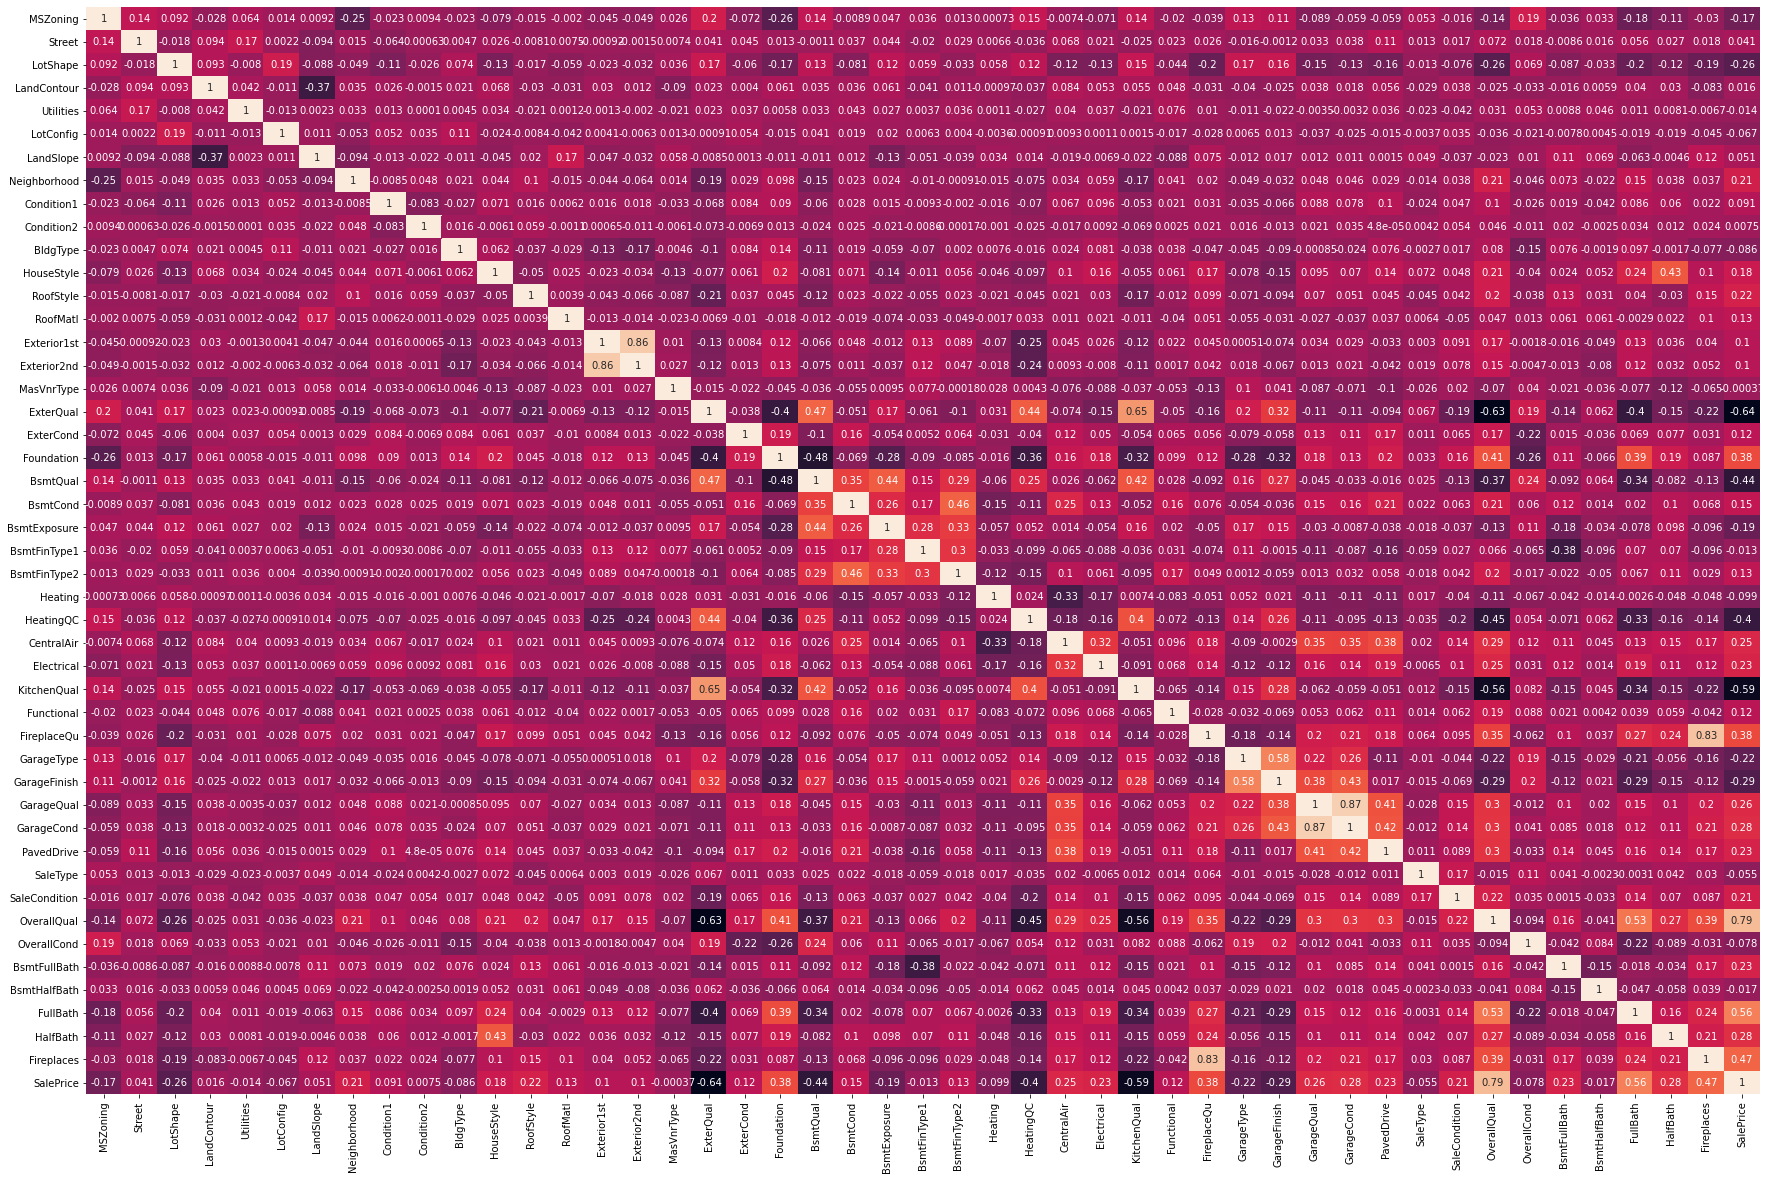

In [22]:
f, ax = plt.subplots(1,1,figsize=(30,20))
coef = data_categorical.corr(method='pearson')
sns.heatmap(coef, annot=True, cbar=False)
plt.show()

З матриці можна побачити які дані найбільше корелюються з цільовою змінною. Для подальшої роботи залишимо змінні з найбільшим коефіцієнтом.

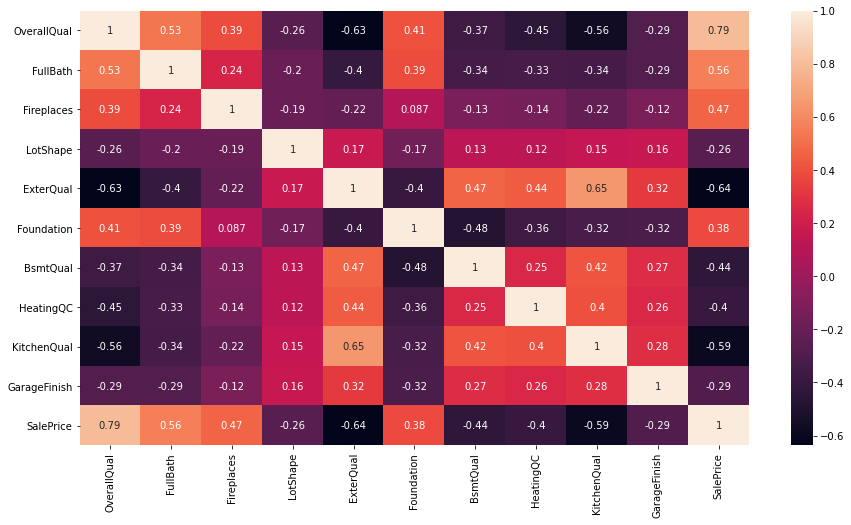

In [23]:
features = ['OverallQual','FullBath','Fireplaces', 'LotShape', 'ExterQual', 'Foundation', 'BsmtQual', 'HeatingQC',
            'KitchenQual','GarageFinish']

data_categorical = data_categorical[features + ['SalePrice']]

f, ax = plt.subplots(1,1,figsize=(15,8))
coef = data_categorical.corr(method='pearson')
sns.heatmap(coef, annot=True)
plt.show()

Категоріальні змінні мають такий вигляд:

In [24]:
data_categorical = data_categorical.drop(columns='SalePrice')
print(data_categorical.shape)
data_categorical.head()

(2918, 10)


,OverallQual,FullBath,Fireplaces,LotShape,ExterQual,Foundation,BsmtQual,HeatingQC,KitchenQual,GarageFinish
0,7,2,0,3,2,2,2,0,2,1
1,6,2,1,3,3,1,2,0,3,1
2,7,2,1,0,2,2,2,0,2,1
3,7,1,1,0,3,0,3,2,2,2
4,8,2,1,0,2,2,2,0,2,1


В наступних візуалізаціях можна дослідити розподіл категоріальних змінних

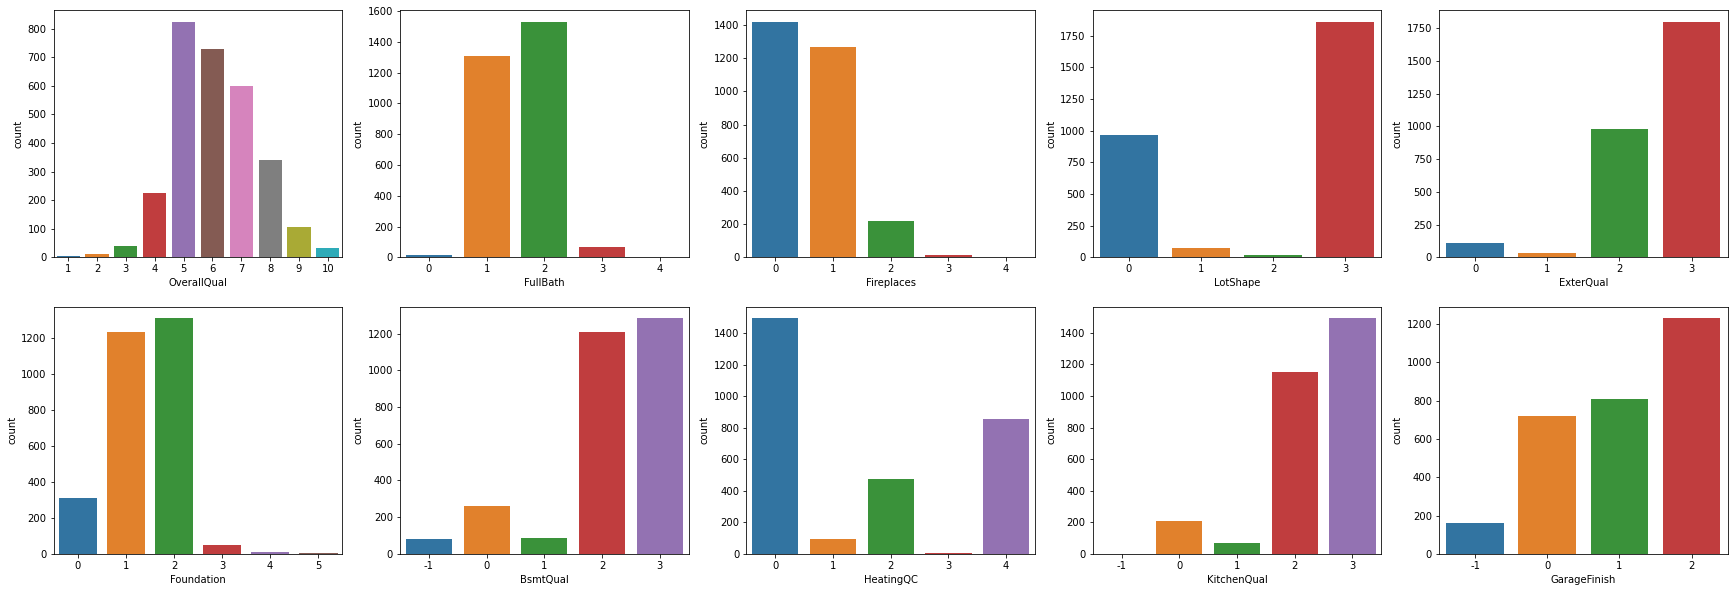

In [25]:
fig, ax = plt.subplots(2, 5, figsize=(30, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
    sns.countplot(x=data_categorical[variable], ax=subplot)

### Put Data together

In [26]:
data = pd.concat([data_numerical, data_categorical, data_target], axis=1)
print(data.shape)
data.head()

(2918, 23)


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,OverallQual,FullBath,Fireplaces,LotShape,ExterQual,Foundation,BsmtQual,HeatingQC,KitchenQual,GarageFinish,SalePrice
0,65.0,8450,2003,2003,196.0,706.0,856,854,1710,548.0,0,61,7,2,0,3,2,2,2,0,2,1,208500.0
1,80.0,9600,1976,1976,0.0,978.0,1262,0,1262,460.0,298,0,6,2,1,3,3,1,2,0,3,1,181500.0
2,68.0,11250,2001,2002,162.0,486.0,920,866,1786,608.0,0,42,7,2,1,0,2,2,2,0,2,1,223500.0
3,60.0,9550,1915,1970,0.0,216.0,961,756,1717,642.0,0,35,7,1,1,0,3,0,3,2,2,2,140000.0
4,84.0,14260,2000,2000,350.0,655.0,1145,1053,2198,836.0,192,84,8,2,1,0,2,2,2,0,2,1,250000.0


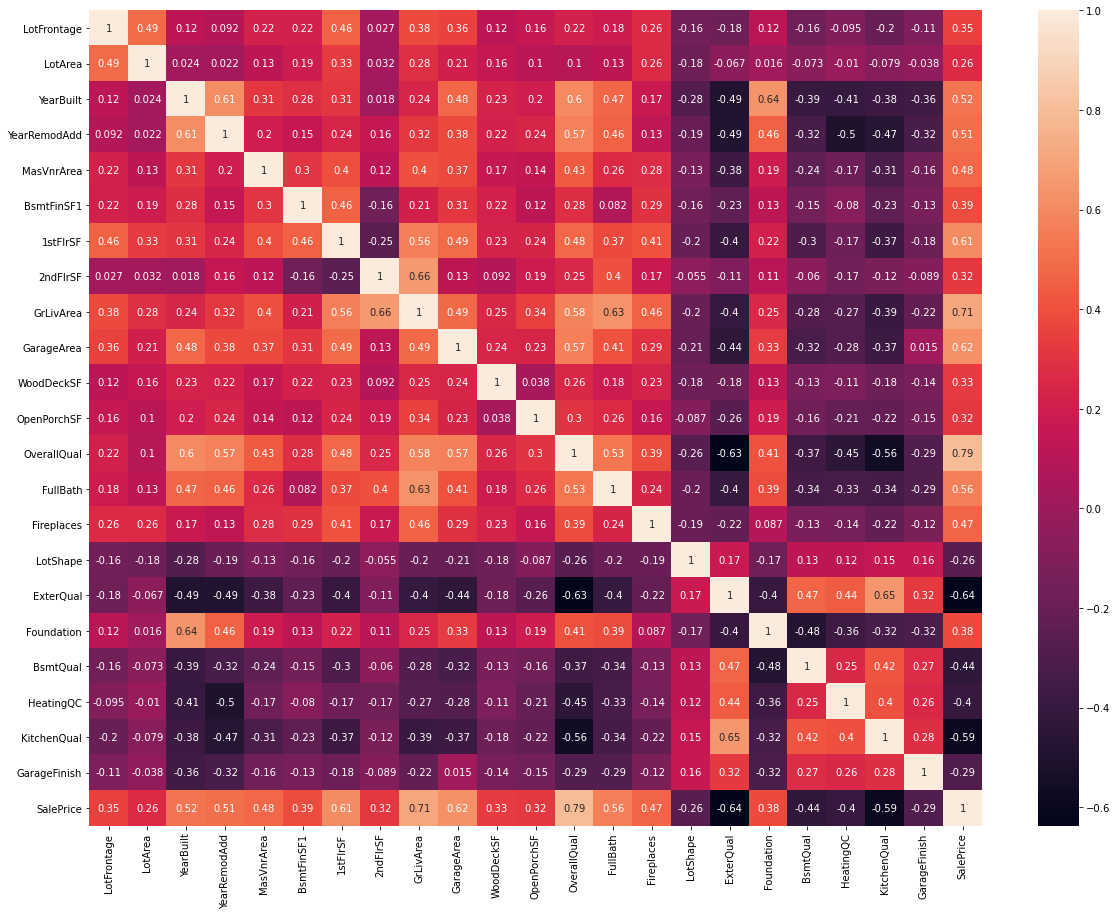

In [27]:
f, ax = plt.subplots(1,1,figsize=(20,15))
coef = data.corr(method='pearson')
sns.heatmap(coef, annot=True)
plt.show()

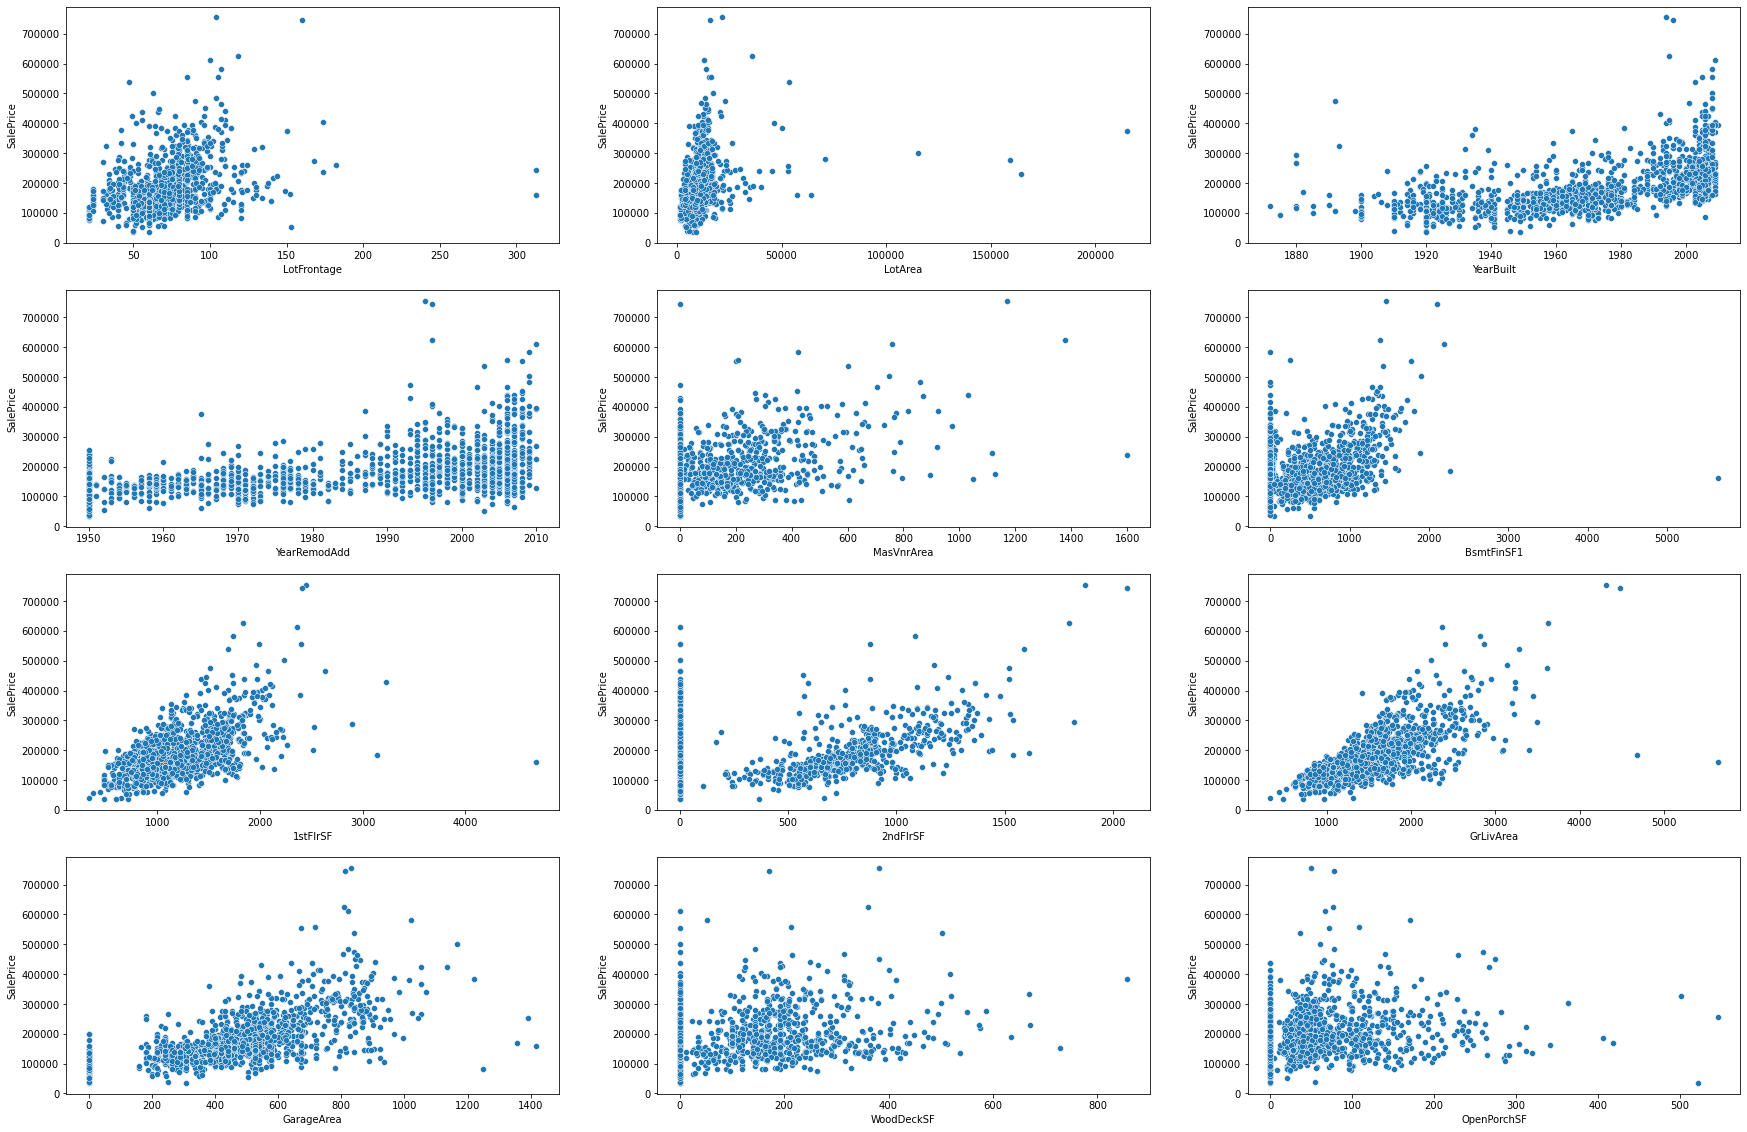

In [28]:
fig, ax = plt.subplots(4,3, figsize=(30, 20))
for var, subplot in zip(data_numerical, ax.flatten()):
    sns.scatterplot(data=pd.concat([data_numerical, data_target], axis=1), x=var, y='SalePrice', ax=subplot)

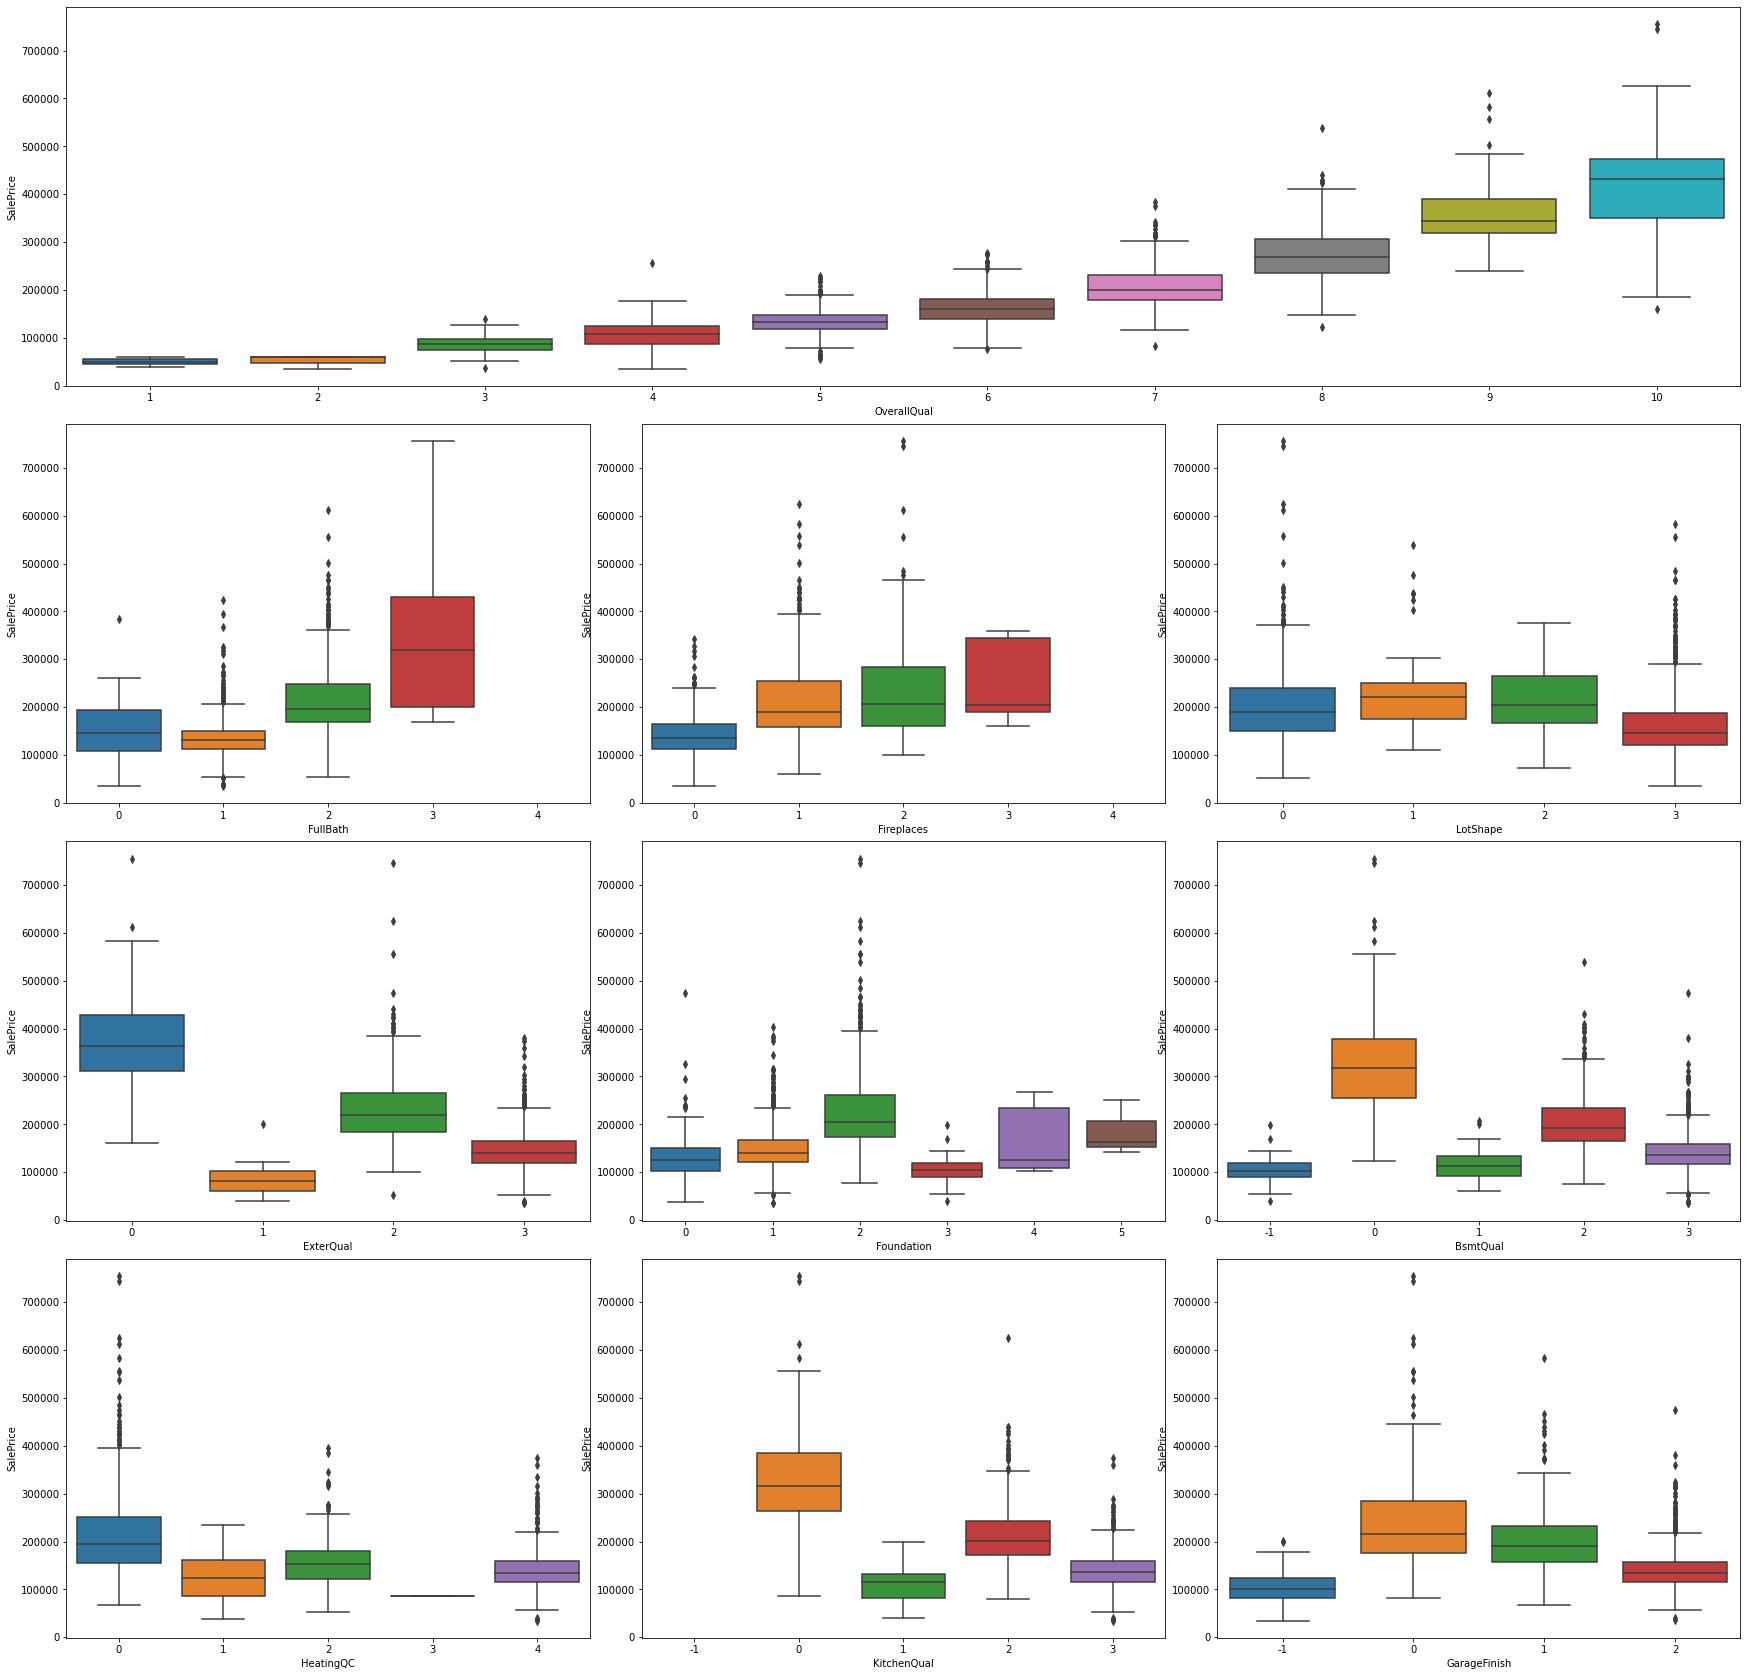

In [29]:
plt.figure(figsize=(30, 30))
grid = plt.GridSpec(4, 3, wspace=0.1, hspace=0.1)
ax = [plt.subplot(grid[0, :]),
      plt.subplot(grid[1, 0]),
      plt.subplot(grid[1, 1]),  
      plt.subplot(grid[1, 2]),
      plt.subplot(grid[2, 0]),
      plt.subplot(grid[2, 1]),
      plt.subplot(grid[2, 2]),
      plt.subplot(grid[3, 0]),
      plt.subplot(grid[3, 1]),
      plt.subplot(grid[3, 2])]

for var, subplot in zip(data_categorical, ax):
    sns.boxplot(x=pd.concat([data_categorical, data_target], axis=1)[var], y=data['SalePrice'], ax=subplot)

### Dealing with missing data

In [30]:
data.isna().sum()

LotFrontage      486
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
OverallQual        0
FullBath           0
Fireplaces         0
LotShape           0
ExterQual          0
Foundation         0
BsmtQual           0
HeatingQC          0
KitchenQual        0
GarageFinish       0
SalePrice       1459
dtype: int64

In [31]:
data[data.columns] = data[data.columns].apply(pd.to_numeric, errors='coerce')
data[data==np.inf] = np.nan

data["MasVnrArea"] = data["MasVnrArea"].fillna(0)
data["BsmtFinSF1"] = data["BsmtFinSF1"].fillna(0)
data["GarageArea"] = data["GarageArea"].fillna(0)
data.fillna(data.median(), inplace=True)


data.isna().sum()


LotFrontage     0
LotArea         0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
OverallQual     0
FullBath        0
Fireplaces      0
LotShape        0
ExterQual       0
Foundation      0
BsmtQual        0
HeatingQC       0
KitchenQual     0
GarageFinish    0
SalePrice       0
dtype: int64

### Split data

In [32]:
data_train = data[:train_n]
data_test = data[train_n:]

data_target = np.log1p(data_target)

data_train = data_train.reset_index()
data_test = data_test.reset_index()


print(data_train.shape)# x train
print(data_test.shape) # x test
print(data_target.shape)# y train


(1459, 24)
(1459, 24)
(1459, 1)


In [33]:
data_test.dtypes

index             int64
LotFrontage     float64
LotArea           int64
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea      float64
BsmtFinSF1      float64
1stFlrSF          int64
2ndFlrSF          int64
GrLivArea         int64
GarageArea      float64
WoodDeckSF        int64
OpenPorchSF       int64
OverallQual       int64
FullBath          int64
Fireplaces        int64
LotShape           int8
ExterQual          int8
Foundation         int8
BsmtQual           int8
HeatingQC          int8
KitchenQual        int8
GarageFinish       int8
SalePrice       float64
dtype: object

### Fit Model

In [34]:
model = KernelRidge(alpha = 0.65, kernel = 'polynomial', degree = 2, coef0=2.5)
params = ['OverallQual', '1stFlrSF', '2ndFlrSF','GarageArea', 'GrLivArea', 'SalePrice']

model.fit(data_train[params], data_target)
predicted_test = model.predict(data_test[params])
predicted_train = model.predict(data_train[params])

C:\Users\vital\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Metrics

In [36]:
print('MSE {:.3f}'.format(mean_squared_error(data_target, predicted_test)))
print('R^2 {:.3f}'.format(r2_score(data_target, predicted_test)))

MSE 2.382
R^2 -13.929


In [37]:
print(np.sum(np.square(predicted_train - data_target)) / len(data_target))

SalePrice    1.28
dtype: float64


Write to csv file

In [38]:
predictions_df = pd.DataFrame()
predictions_df['Id'] = data_test_id
predictions_df['SalePrice'] = predicted_train

predictions_df.to_csv('prediction.csv', index=False)